<a href="https://colab.research.google.com/github/gdoteof/neuralnet_stuff/blob/master/adoption_pictures_neural_nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash
from fastai.vision import *

Updating fastai...
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
Done.


In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
BASE = "/content/drive/My Drive/fastai-v3/data/petadoption"

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir(BASE + "/train_images"))

# Any results you write to the current directory are saved as output.

In [0]:

#!KAGGLE_USERNAME=gdoteof KAGGLE_KEY=##### kaggle competitions download -c petfinder-adoption-prediction


In [0]:
!ls -l /content
!mkdir -p "{BASE}"


total 4
lrwxrwxrwx 1 root root   18 Mar 25 15:38 data -> /root/.fastai/data
drwx------ 3 root root 4096 Mar 25 15:39 drive
lrwxrwxrwx 1 root root   19 Mar 25 15:38 models -> /root/.torch/models


In [0]:
!ls -l "{BASE}"

total 2068414
-rw------- 1 root root   23185209 Mar 21 01:17 data_save.pkl
drwx------ 2 root root       4096 Mar 20 21:59 models
drwx------ 2 root root       4096 Mar 20 20:22 test
drwx------ 2 root root       4096 Mar 20 18:56 test_images
-rw------- 1 root root  410128757 Mar 20 18:35 test_images.zip
drwx------ 2 root root       4096 Mar 20 19:03 test_metadata
-rw------- 1 root root   14602132 Mar 20 18:35 test_metadata.zip
drwx------ 2 root root       4096 Mar 20 19:07 test_sentiment
-rw------- 1 root root    3254800 Mar 20 18:35 test_sentiment.zip
-rw------- 1 root root     643897 Mar 20 18:35 test.zip
drwx------ 2 root root       4096 Mar 20 20:24 train
drwx------ 2 root root       4096 Mar 20 20:23 train_images
-rw------- 1 root root 1595336815 Mar 20 18:35 train_images.zip
drwx------ 2 root root       4096 Mar 20 19:10 train_metadata
-rw------- 1 root root   56196604 Mar 20 18:35 train_metadata.zip
drwx------ 2 root root       4096 Mar 20 20:14 train_sentiment
-rw------- 1 root r

In [0]:
#!mv train* "{BASE}"
#!mv test*  "{BASE}"

In [0]:
f = "train_sentiment"

In [0]:
!mkdir -p "{BASE}/{f}"
#!unzip -q "{BASE}/{f}.zip" -d "{BASE}/{f}"

In [0]:
!echo "{BASE}/test"
!ls -l "{BASE}/test"

/content/drive/My Drive/fastai-v3/data/petadoption/test
total 1884
-rw------- 1 root root   47396 Dec 26 19:17 sample_submission.csv
-rw------- 1 root root 1881101 Dec 26 19:17 test.csv


In [0]:
from fastai import *
from fastai.vision import *
from fastai.tabular import *

In [0]:
path = Path(BASE)


In [0]:
path_train_img = path/'train_images';
path_test_img = path/'test_images';
path_train = path/'train';
path_test = path/'test'; 
path_train_sentiment = path/'train_sentiment';
path_test_sentiment = path/'test_sentiment';


# Can we predict adoptions just from pictures?

In [0]:
train_imgs = path_train_img.ls()
"""
this sometimes fails with largeish (50k files) folders when using google drive.  
 seems like the cache needs to warm up (or something) as trying a bunch of times
 and then waiting seems to be effective.
 
 teh real solution to this is to get the data loaded once and save/load that way
 rather than rebuild the databunch like a scrube every time
"""

'\nthis sometimes fails with largeish (50k files) folders when using google drive.  \n seems like the cache needs to warm up (or something) as trying a bunch of times\n and then waiting seems to be effective.\n \n teh real solution to this is to get the data loaded once and save/load that way\n rather than rebuild the databunch like a scrube every time\n'

In [0]:
df_img = pd.DataFrame(columns=['Image'], data=path_train_img.ls())

In [0]:
#df_img

In [0]:
df_img['Image'] = df_img['Image'].astype(np.str).replace(to_replace='/content/drive/My Drive/fastai-v3/data/petadoption/',value='./', regex=True)
df_img.head()

Image
0   ./train_images/ce0294cec-3.jpg
1   ./train_images/2f4c6ada3-1.jpg
2  ./train_images/d4ec04b8e-19.jpg
3   ./train_images/326c9c979-5.jpg
4  ./train_images/c670993fc-14.jpg

In [0]:
df_tab = pd.read_csv(path_train/'train.csv')

In [0]:
df_tab.head().transpose()

0  \
Type                                                           2   
Name                                                      Nibble   
Age                                                            3   
Breed1                                                       299   
Breed2                                                         0   
Gender                                                         1   
Color1                                                         1   
Color2                                                         7   
Color3                                                         0   
MaturitySize                                                   1   
FurLength                                                      1   
Vaccinated                                                     2   
Dewormed                                                       2   
Sterilized                                                     2   
Health                                                         1   
Quantity                                                       1   
Fee                                                          100   
State                                                      41326   
RescuerID                       8480853f516546f6cf33aa88cd76c379   
VideoAmt                                                       0   
Description    Nibble is a 3+ month old ball of cuteness. He ...   
PetID                                                  86e1089a3   
PhotoAmt                                                       1   
AdoptionSpeed                                                  2   

                                                               1  \
Type                                                           2   
Name                                                 No Name Yet   
Age                                                            1   
Breed1                                                       265   
Breed2                                                         0   
Gender                                                         1   
Color1                                                         1   
Color2                                                         2   
Color3                                                         0   
MaturitySize                                                   2   
FurLength                                                      2   
Vaccinated                                                     3   
Dewormed                                                       3   
Sterilized                                                     3   
Health                                                         1   
Quantity                                                       1   
Fee                                                            0   
State                                                      41401   
RescuerID                       3082c7125d8fb66f7dd4bff4192c8b14   
VideoAmt                                                       0   
Description    I just found it alone yesterday near my apartm...   
PetID                                                  6296e909a   
PhotoAmt                                                       2   
AdoptionSpeed                                                  0   

                                                               2  \
Type                                                           1   
Name                                                      Brisco   
Age                                                            1   
Breed1                                                       307   
Breed2                                                         0   
Gender                                                         1   
Color1                                                         2   
Color2                                                         7   
Color3                                           

PetID is the lookup(?) for the images.

In [0]:
def getIdFromImgPath(x):  return re.search('.*\/(\w*)', str(x), re.IGNORECASE).group(1)
"sloppily converts path to string, then pulls the id out"
path2 = df_img.iloc[0].Image
print(path2)
print(getIdFromImgPath(df_img.iloc[0].Image))

./train_images/ce0294cec-3.jpg
ce0294cec


So, now we need to use the img id to associate each image with an adoption speed

In [0]:
df_img['petId'] = df_img['Image'].map(getIdFromImgPath)

In [0]:
df_img.head().transpose()

0                               1  \
Image  ./train_images/ce0294cec-3.jpg  ./train_images/2f4c6ada3-1.jpg   
petId                       ce0294cec                       2f4c6ada3   

                                     2                               3  \
Image  ./train_images/d4ec04b8e-19.jpg  ./train_images/326c9c979-5.jpg   
petId                        d4ec04b8e                       326c9c979   

                                     4  
Image  ./train_images/c670993fc-14.jpg  
petId                        c670993fc

In [0]:
df_tab.head().transpose()

0  \
Type                                                           2   
Name                                                      Nibble   
Age                                                            3   
Breed1                                                       299   
Breed2                                                         0   
Gender                                                         1   
Color1                                                         1   
Color2                                                         7   
Color3                                                         0   
MaturitySize                                                   1   
FurLength                                                      1   
Vaccinated                                                     2   
Dewormed                                                       2   
Sterilized                                                     2   
Health                                                         1   
Quantity                                                       1   
Fee                                                          100   
State                                                      41326   
RescuerID                       8480853f516546f6cf33aa88cd76c379   
VideoAmt                                                       0   
Description    Nibble is a 3+ month old ball of cuteness. He ...   
PetID                                                  86e1089a3   
PhotoAmt                                                       1   
AdoptionSpeed                                                  2   

                                                               1  \
Type                                                           2   
Name                                                 No Name Yet   
Age                                                            1   
Breed1                                                       265   
Breed2                                                         0   
Gender                                                         1   
Color1                                                         1   
Color2                                                         2   
Color3                                                         0   
MaturitySize                                                   2   
FurLength                                                      2   
Vaccinated                                                     3   
Dewormed                                                       3   
Sterilized                                                     3   
Health                                                         1   
Quantity                                                       1   
Fee                                                            0   
State                                                      41401   
RescuerID                       3082c7125d8fb66f7dd4bff4192c8b14   
VideoAmt                                                       0   
Description    I just found it alone yesterday near my apartm...   
PetID                                                  6296e909a   
PhotoAmt                                                       2   
AdoptionSpeed                                                  0   

                                                               2  \
Type                                                           1   
Name                                                      Brisco   
Age                                                            1   
Breed1                                                       307   
Breed2                                                         0   
Gender                                                         1   
Color1                                                         2   
Color2                                                         7   
Color3                                           

In [0]:
def getAdoptionSpeed(petId): return (df_tab.loc[df_tab['PetID'] == petId]['AdoptionSpeed']).item()

petid = df_img.iloc[0].petId
print(petid)
getAdoptionSpeed(petid)

ce0294cec


3

In [0]:
df_img['adoptionSpeed'] = df_img['petId'].map(getAdoptionSpeed)

In [0]:
df_img['name'] = df_img['Image']

In [0]:
df_img['label'] = df_img['adoptionSpeed']

In [0]:
del df_img['Image']

In [0]:
del df_img['adoptionSpeed']

In [0]:
del df_img['petId']

In [0]:
df_img.head()

name  label
0   ./train_images/ce0294cec-3.jpg      3
1   ./train_images/2f4c6ada3-1.jpg      3
2  ./train_images/d4ec04b8e-19.jpg      4
3   ./train_images/326c9c979-5.jpg      3
4  ./train_images/c670993fc-14.jpg      1

In [0]:
def get_label(path): 
  return getAdoptionSpeed(getIdFromImgPath(path))

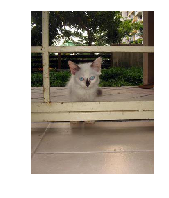

In [0]:
img = open_image(path/df_img.loc[2421]['name'])
img.show()

In [0]:
!ls -alh "{BASE}/{df_img.loc[8103]['name']}"

ls: cannot access '{BASE}/{df_img.loc[8103]['\''name'\'']}': No such file or directory


In [0]:
tfms = get_transforms()
bs=512
"Had to set num_worksers=0 to get around an error with kaggle's runtime"
#data = ImageDataBunch.from_df(BASE,df_img, ds_tfms=tfms, size=128, bs=bs, num_workers=4).normalize(imagenet_stats)

"Had to set num_worksers=0 to get around an error with kaggle's runtime"

# Jump here to load data

In [0]:
data = load_data(BASE)

In [0]:
!/opt/bin/nvidia-smi


Mon Mar 25 15:53:35 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.79       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    30W / 149W |     11MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
#!ps aux | grep python 

In [0]:
#!kill -9 1993

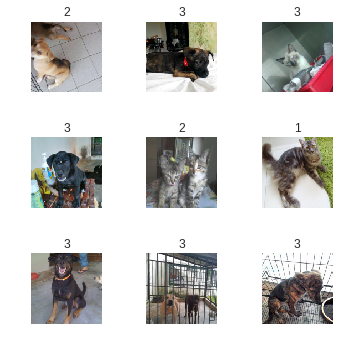

In [0]:

data.show_batch(rows=3,figsize=(5,5))

In [0]:
kappa = KappaScore()
kappa.weights = "quadratic"

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate,kappa])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:00, 97034890.60it/s]


In [0]:

print(torch.__version__)
print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)

1.0.1.post2
True
True


In [0]:

learn.fit_one_cycle(1)

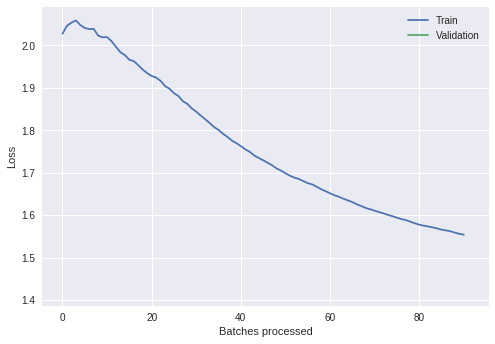

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


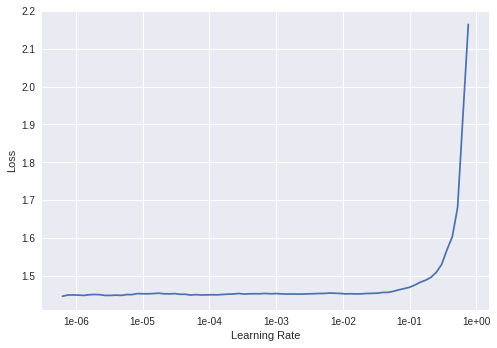

In [0]:
learn.recorder.plot()


# Can we fit it any better?

In [0]:
learn.fit_one_cycle(3, 1e-5)

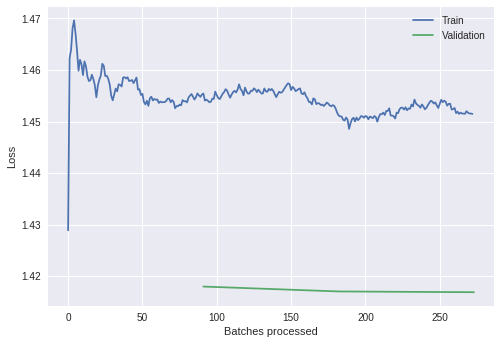

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage1')
data.save()

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(3, 1e-5)

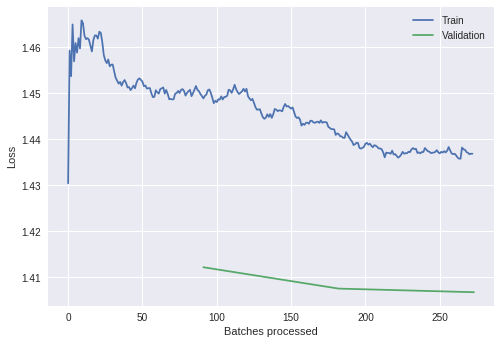

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.fit_one_cycle(7, [1e-6,1e-5,1e-3])

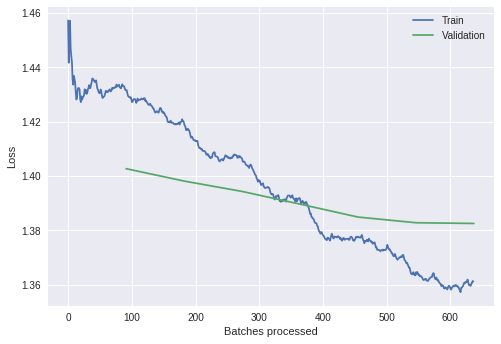

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.save('overfit1')

In [0]:
learn.load('overfit1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)


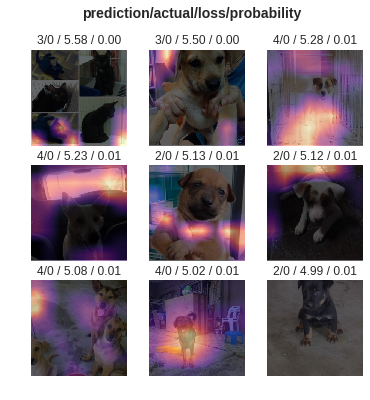

In [0]:
interp.plot_top_losses(9, figsize=(6,6))


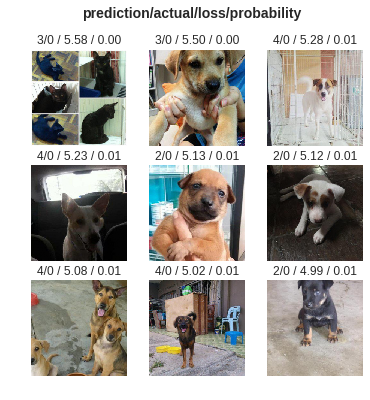

In [0]:
interp.plot_top_losses(9, figsize=(6,6), heatmap=False)

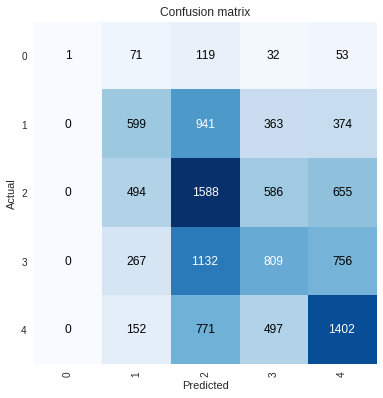

In [0]:
interp.plot_confusion_matrix()


In [0]:
preds = learn.get_preds()

In [0]:
def tensor2array(t):
  map(

In [0]:
preds[0].shape

torch.Size([11662, 5])

In [0]:
preds_readable = preds[0].numpy()

In [0]:
df_preds=pd.DataFrame(preds_readable)

In [0]:
df_preds.agg(['min','max','mean'])

0         1         2         3         4
min   0.000881  0.011553  0.051270  0.068888  0.010863
max   0.291216  0.580098  0.578036  0.574962  0.836372
mean  0.020406  0.198183  0.284946  0.262161  0.234303

In [0]:
df_preds['actual'] = preds[1].numpy()

In [0]:
df_preds.head()

0         1         2         3         4  actual
0  0.017767  0.283273  0.315052  0.226800  0.157108       3
1  0.010827  0.130243  0.212176  0.269358  0.377396       2
2  0.020594  0.233834  0.335406  0.234741  0.175426       4
3  0.045273  0.460194  0.326950  0.133876  0.033707       1
4  0.017486  0.196609  0.349273  0.270977  0.165655       2

In [0]:
df_preds[0].idxmax(5)

11209

In [0]:
df_preds[0].nlargest(3)

11209    0.291216
2629     0.224844
6448     0.214788
Name: 0, dtype: float32

# Most likely to adopt pets!

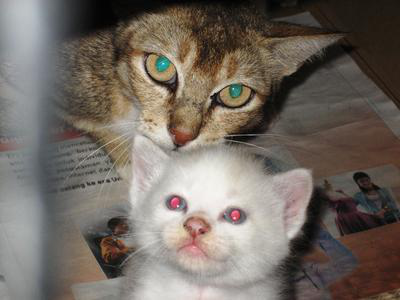

In [0]:
learn.data.valid_ds.x[11209]

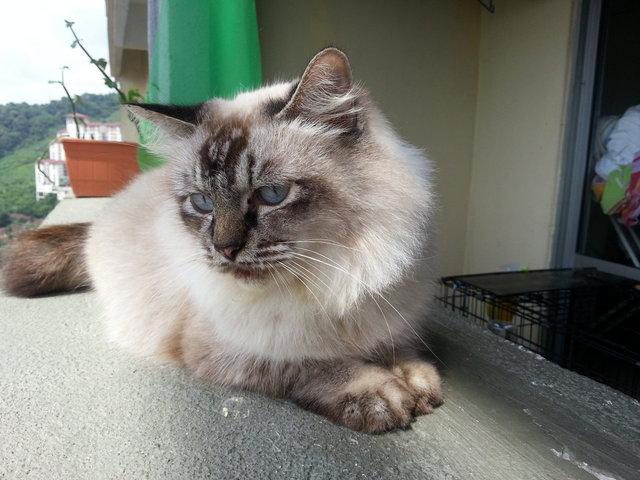

In [0]:
learn.data.valid_ds.x[2629]


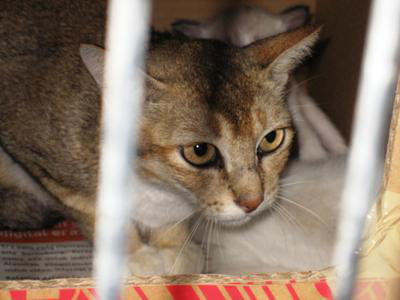

In [0]:

learn.data.valid_ds.x[6448]

# Least likely to be adopted

In [0]:
df_preds[4].nlargest(3)

4426    0.836372
4941    0.829831
3016    0.782210
Name: 4, dtype: float32

And this is the saddest thing the network knows about.  The pet, simply

by looking at it, that is least likely to be adopted within the 100 day limit.



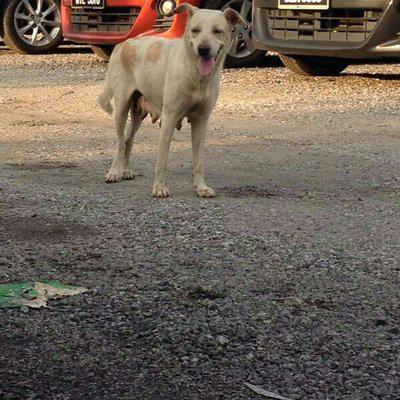

In [0]:
learn.data.valid_ds.x[4426]

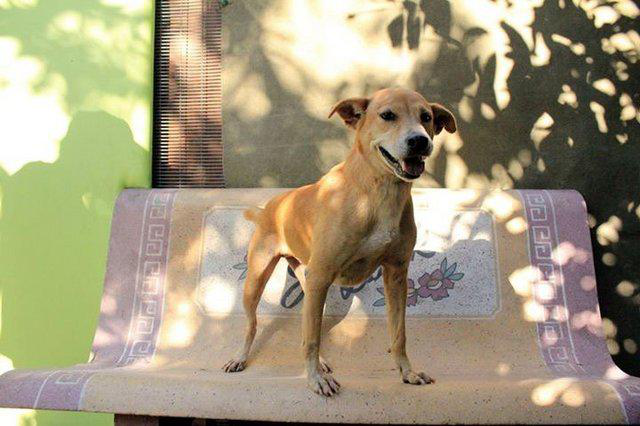

In [0]:
learn.data.valid_ds.x[4941]

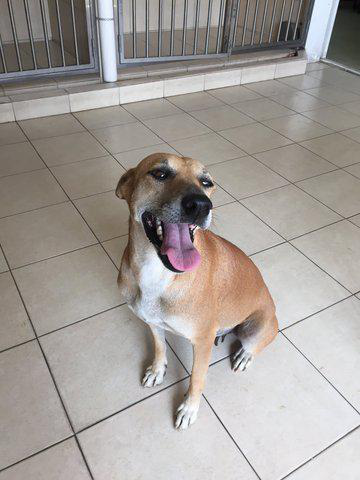

In [0]:
learn.data.valid_ds.x[3016]

# Most likely to be adopted not right away but reasonably quickjly!

In [0]:
df_preds[2].nlargest(5)

4352    0.578036
9304    0.568448
7321    0.568410
7395    0.554754
5333    0.552571
Name: 2, dtype: float32

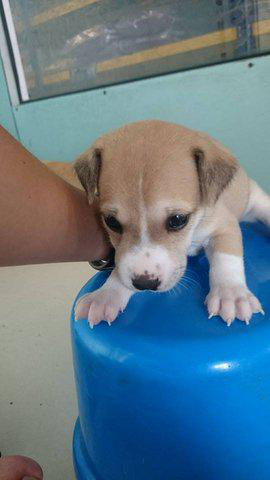

In [0]:
learn.data.valid_ds.x[4352]

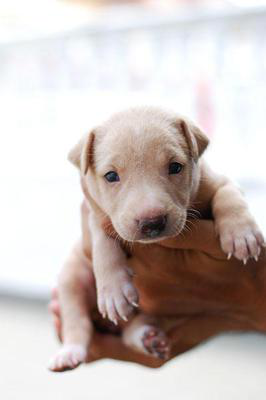

In [0]:
learn.data.valid_ds.x[9304]

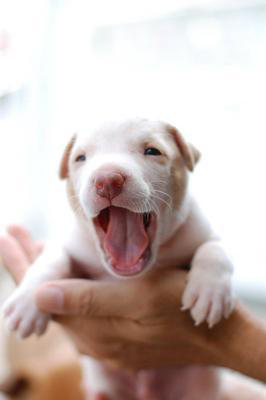

In [0]:
learn.data.valid_ds.x[7321]

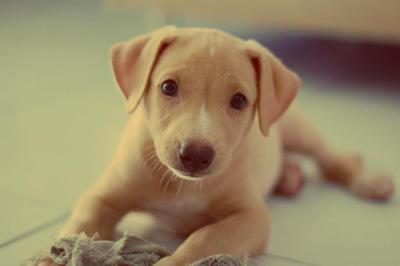

In [0]:
learn.data.valid_ds.x[7395]

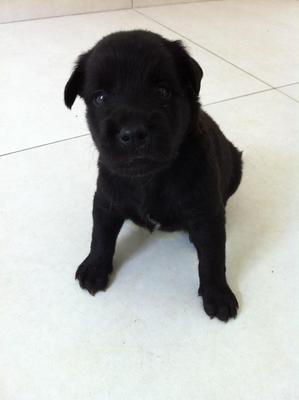

In [0]:
learn.data.valid_ds.x[5333]

In [0]:
df_img.head()

Image      petId  adoptionSpeed
0   ./train_images/ce0294cec-3.jpg  ce0294cec              3
1   ./train_images/2f4c6ada3-1.jpg  2f4c6ada3              3
2  ./train_images/d4ec04b8e-19.jpg  d4ec04b8e              4
3   ./train_images/326c9c979-5.jpg  326c9c979              3
4  ./train_images/c670993fc-14.jpg  c670993fc              1

In [0]:
tfms = get_transforms()
bs=256
"Had to set num_worksers=0 to get around an error with kaggle's runtime"
data_bigger = ImageDataBunch.from_df(BASE,df_img, ds_tfms=tfms, size=256, bs=bs, num_workers=4).normalize(imagenet_stats)

In [0]:
data_bigger

ImageDataBunch;

Train: LabelList (46649 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
3,3,4,3,1
Path: /content/drive/My Drive/fastai-v3/data/petadoption;

Valid: LabelList (11662 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
3,2,4,1,2
Path: /content/drive/My Drive/fastai-v3/data/petadoption;

Test: None

In [0]:
learn.data = data_bigger

In [0]:
learn.freeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


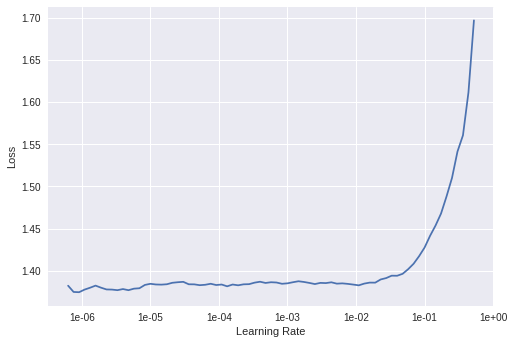

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1,1e-3)

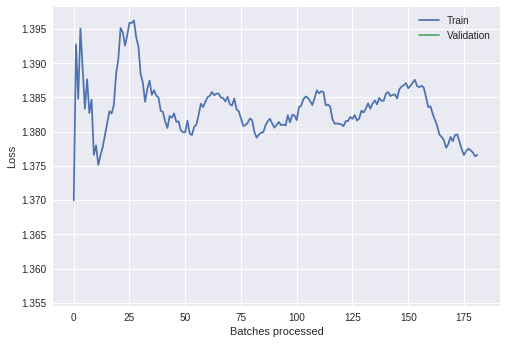

In [0]:
learn.recorder.plot_losses()

NameError: ignored

In [0]:
learn.fit_one_cycle(3,[1e-6,1e-4.5,1e-3])

 Make it better

In [0]:
learn.load('overfit1')

Learner(data=ImageDataBunch;

Train: LabelList (46649 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
3,3,4,3,1
Path: /content/drive/My Drive/fastai-v3/data/petadoption;

Valid: LabelList (11662 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
2,3,2,1,4
Path: /content/drive/My Drive/fastai-v3/data/petadoption;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, 

In [0]:
tfms = get_transforms()
bs=256
size=256

In [0]:

"Had to set num_worksers=0 to get around an error with kaggle's runtime"
data_bigger = ImageDataBunch.from_df(BASE,df_img, ds_tfms=tfms, size=size, bs=bs, num_workers=4).normalize(imagenet_stats)

In [0]:
size=256
bs=256
seed=420
data_bigger = (
    ImageList.from_df(df_img, BASE)
                .split_by_rand_pct(seed=seed)
                .label_from_df()
                .transform(tfms, size=size)
                .add_test_folder('test_images')
                .databunch(bs=bs)
                .normalize(imagenet_stats)
              )

In [0]:
learn.load('overfit1')
learn.unfreeze()


In [0]:
learn.freeze()
learn.data = data_bigger

In [0]:

learn.fit_one_cycle(1,1e-6)

In [0]:
learn.fit_one_cycle(1,[1e-6,1e-9/2,1e-3])

In [0]:
learn.fit_one_cycle(5,[1e-6,1e-9/2,1e-3])

In [0]:
learn.fit_one_cycle(5,[1e-6,1e-9/2,1e-3])

In [0]:
learn.save('biggerIsBetter')

In [0]:
learn

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

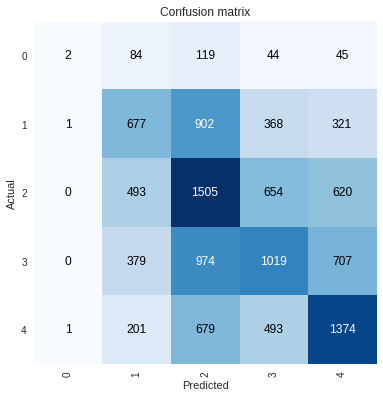

In [50]:
interp.plot_confusion_matrix()

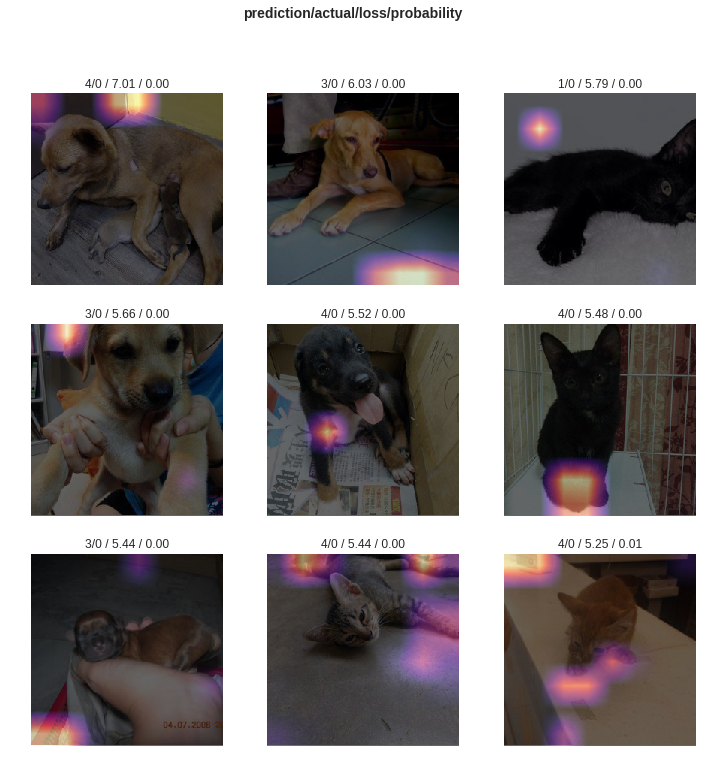

In [51]:
interp.plot_top_losses(9)

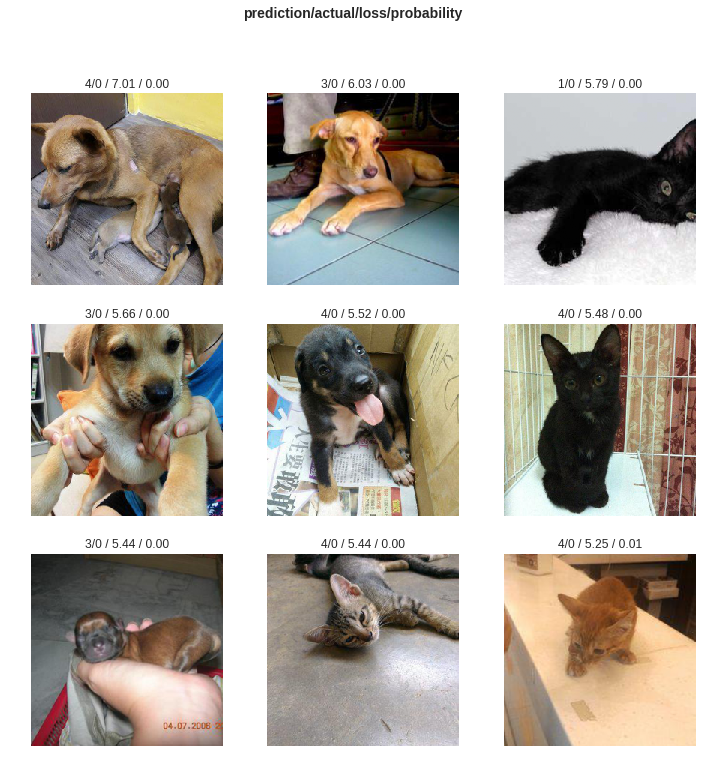

In [53]:
interp.plot_top_losses(9,heatmap=False)

In [0]:
preds=learn.get_preds()

In [55]:
preds

[tensor([[0.0010, 0.0494, 0.1296, 0.0869, 0.7331],
         [0.0293, 0.2550, 0.3178, 0.2676, 0.1303],
         [0.0262, 0.4509, 0.1971, 0.2471, 0.0787],
         ...,
         [0.0153, 0.3344, 0.2583, 0.2810, 0.1110],
         [0.0159, 0.1174, 0.2327, 0.3004, 0.3337],
         [0.0352, 0.2894, 0.2945, 0.2561, 0.1248]]),
 tensor([4, 4, 1,  ..., 3, 4, 3])]

In [58]:
len(preds[0])

11662

In [60]:
len(learn.data.y)

46649